## An Exploratory Data Analysis on Fictituous FinTech Customer Churn
Emudiaga Rukevwe Ericson 
(_ML Engineer_)

#### Importing Relevant Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Reading in the data from Excel

In [164]:
df = pd.read_excel('Bank_Churn_Messy[1].xlsx')

#### Exploring the data

In [165]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


#### Data Preprocessing
While exploring the dataset, i noticed the following"
- Salary attribute is not in float or integer
- Geography had inconsistent entries

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10001 non-null  int64  
 1   Surname          9998 non-null   object 
 2   CreditScore      10001 non-null  int64  
 3   Geography        10001 non-null  object 
 4   Gender           10001 non-null  object 
 5   Age              9998 non-null   float64
 6   Tenure           10001 non-null  int64  
 7   EstimatedSalary  10001 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 625.2+ KB


In [170]:
##At this point, I treated the salary attribute to remove the currency symbol and convert it to float to permit mathematical operations on it


""" df['EstimatedSalary']=df['EstimatedSalary'].str.replace('€','').astype(float)
"""

" df['EstimatedSalary']=df['EstimatedSalary'].str.replace('€','').astype(float)\n"

In [132]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary
count,1.000100e+04,10001.000000,9998.000000,10001.000000,10001.000000
mean,1.569093e+07,650.542946,38.920984,5.012699,99756.038763
std,7.193531e+04,96.658818,10.489116,2.892047,60583.962827
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000
25%,1.562852e+07,584.000000,32.000000,3.000000,50908.480000
50%,1.569073e+07,652.000000,37.000000,5.000000,100183.050000
75%,1.575323e+07,718.000000,44.000000,7.000000,149384.430000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000


At this point I decided to evaluate each of the numerical attributes to detect ouliers.
- The result pointed to the EstimatedSalary and hence needs treatment using 99th percentile method

<Axes: ylabel='EstimatedSalary'>

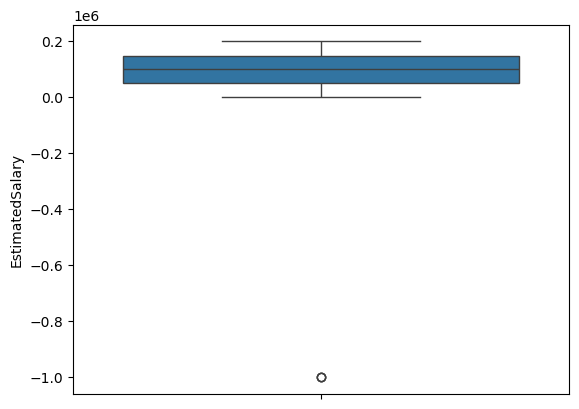

In [133]:
sns.boxplot(df['EstimatedSalary'])

In [138]:
threshold = df['EstimatedSalary'].quantile(0.01)
df = df[df['EstimatedSalary'] > threshold]

<Axes: ylabel='EstimatedSalary'>

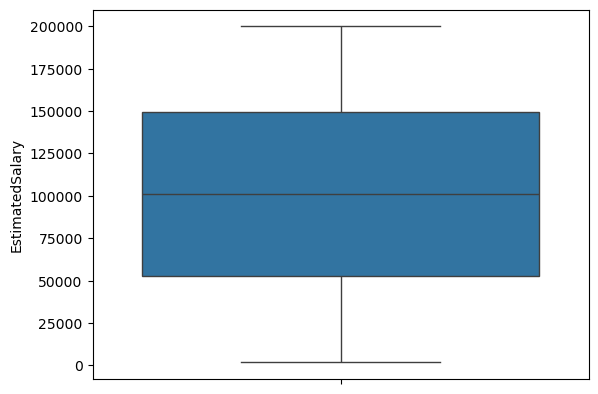

In [139]:
sns.boxplot(df['EstimatedSalary'])

In [147]:
df.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
count,9.900000e+03,9900,9900.000000,9900,9900,9900.000000,9900.000000,9900.000000
unique,NaN,2918,NaN,3,2,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN
freq,NaN,31,NaN,4958,5404,NaN,NaN,NaN
mean,1.569101e+07,NaN,650.441818,NaN,NaN,38.913636,5.010909,101067.916473
std,7.192947e+04,NaN,96.692885,NaN,NaN,10.489038,2.891492,56945.988827
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,1795.930000
25%,1.562855e+07,NaN,584.000000,NaN,NaN,32.000000,2.750000,52469.082500
50%,1.569101e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,101019.015000
75%,1.575322e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,149633.960000


Having treated the salary attribute, I continued to fixing the inconsistency issues found in the geography attribute

In [145]:
df['Geography'].value_counts()

Geography
Germany    2483
Spain      2459
France     1717
French     1640
FRA        1601
Name: count, dtype: int64

In [146]:
df['Geography'].replace('French', 'France', inplace=True)
df['Geography'].replace('FRA', 'France', inplace=True)
df['Geography'].value_counts()

C:\Users\HELLO\AppData\Local\Temp\ipykernel_10604\3679890584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Geography'].replace('French', 'France', inplace=True)
C:\Users\HELLO\AppData\Local\Temp\ipykernel_10604\3679890584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Geography
France     4958
Germany    2483
Spain      2459
Name: count, dtype: int64

At this point, I utilized the pairplot to understand the distribution and possible relationship between each of the numerical attributes and how they are distributed across gender


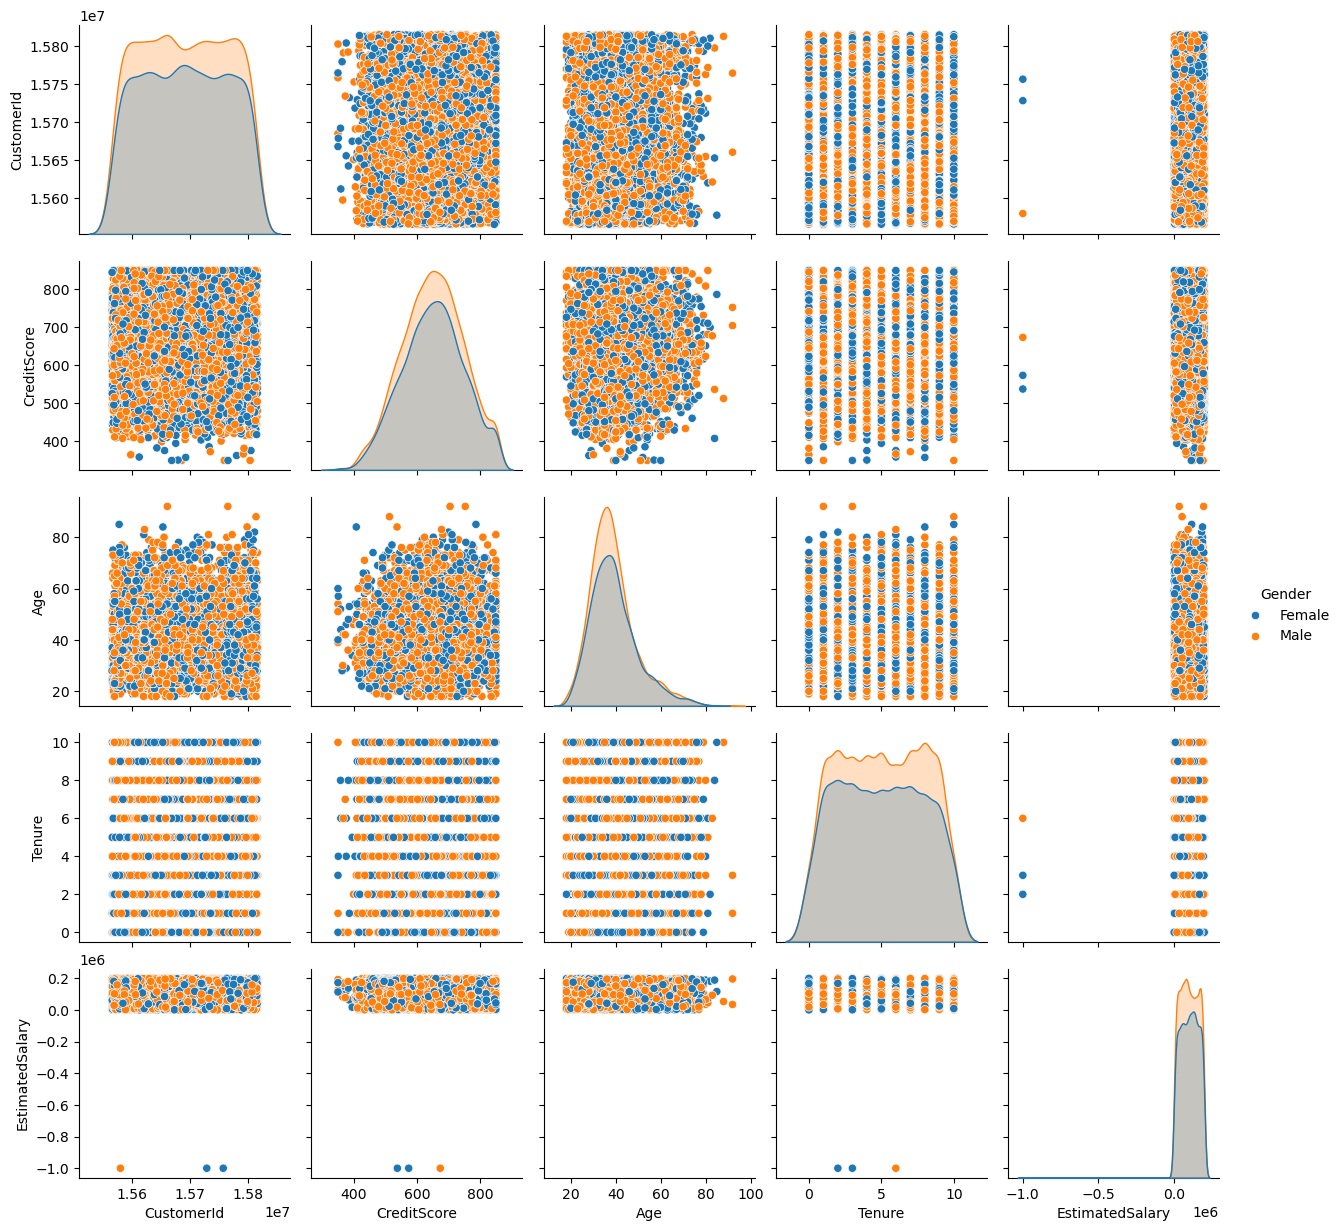

In [171]:
sns.pairplot(df, hue ='Gender')

<Axes: >

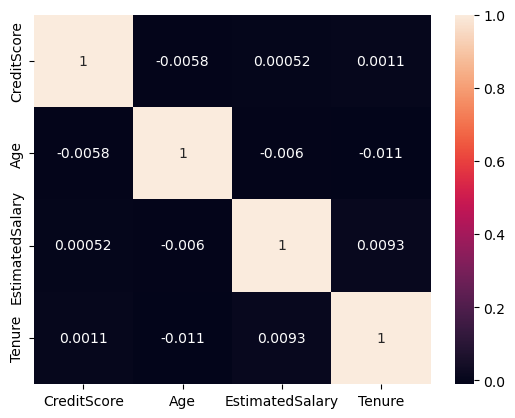

In [161]:
data = ['CreditScore', 'Age', 'EstimatedSalary', 'Tenure']
ht=df[data].corr()
sns.heatmap(ht, annot=True)


Finally, the correlation the heatmap visualization clarified the nature of relationship between the variables.
The correlation coefficients are all less than 1%, indicating a very weak association between the attributes

### This marks the end of this EDA project